## Visualización de datos médicos

### Importando las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ManuelKlug\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Leyendo el dataset y analizando su información

In [2]:
df = pd.read_csv("data/medical_examination.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Agregar una columna "overweight"

**English**: Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

**Español**: Agregar una columna "sobrepreso" al DataFrame. Para determinar si una persona es obesa, primero calcula su IMC (Índice de Masa Corporal) dividiendo su peso en kilogramos por el cuadrado de su altura en metros. Si ese valor es > 25 entonces la persona tiene sobrepreso. Usa el valor 0 para NO sobrepreso y el valor 1 para sobrepreso.

Modificando la unidad de medida de la columna `height` (altura) - de centímetros a metros

In [7]:
df["height"] = df["height"] / 100

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


Creando la columna `overweight` como la división de las columnas `weight` y el cuadrado de la columa `height`

In [9]:
df["overweight"] = df["weight"] / (df["height"]**2)

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


Aplicando la función lambda que devuelve 1 si overweight >= 25 o 0 en caso contrario:

In [11]:
df["overweight"] = df["overweight"].apply(lambda x: 1 if x >= 25 else 0)

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0


### Normalizar la información de las columnas `cholesterol` y `gluc`
Si cada dato en estas columnas es 1, cambiarlo por el valor 0.
Si cada dato es mayor a 1, cambiarlo por 1.

In [13]:
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)

In [14]:
df["cholesterol"].unique()

array([0, 1], dtype=int64)

In [15]:
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)

In [16]:
df["gluc"].unique()

array([0, 1], dtype=int64)

### Trabajando sobre el formato del DataFrame con `pd.melt()` y `pd.groupby()`

In [17]:
df_cat = (pd.melt(df, id_vars="cardio", 
                 value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]))

In [18]:
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [19]:
df_cat['total'] = 1
df_cat = df_cat.groupby(['variable', 'cardio', 'value'], as_index=False).count()

In [20]:
#df["overweight"] = (df["weight"] / (df["height"] / 100)**2).apply(lambda x: 1 if x >= 25 else 0)

In [21]:
df_cat

,variable,cardio,value,total
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,1941
6,alco,1,0,33156
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691


### Graficando categorical features

<Figure size 432x288 with 0 Axes>

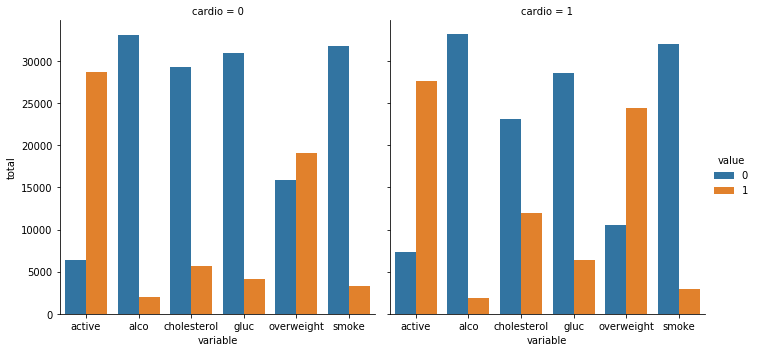

In [22]:
plt.figure() # Creando una figura de Matplotlib

sns.catplot(x="variable", y="total", hue="value", col="cardio", kind="bar", data=df_cat) # Gráfico

plt.savefig("images/catplot.png") # Guardando la imagen como "catplot.png"

### Cleaning the data.

Filtrando los siguientes segmentos de pacientes que representan información incorrecta:
- diastolic pressure is higher then systolic
- height is less than the 2.5th percentile
- height is more than the 97.5th percentile
- weight is less then the 2.5th percentile
- weight is more than the 97.5th percentile

In [23]:
df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))]

In [24]:
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


### Graficando matriz de correlación

#### Calculando la matriz de correlación

In [25]:
corr = df_heat.corr()

#### Generando un mask para el triángulo superior.

In [26]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#### Generando la figura y axes de Matplotlib y graficando la matriz de correlación:

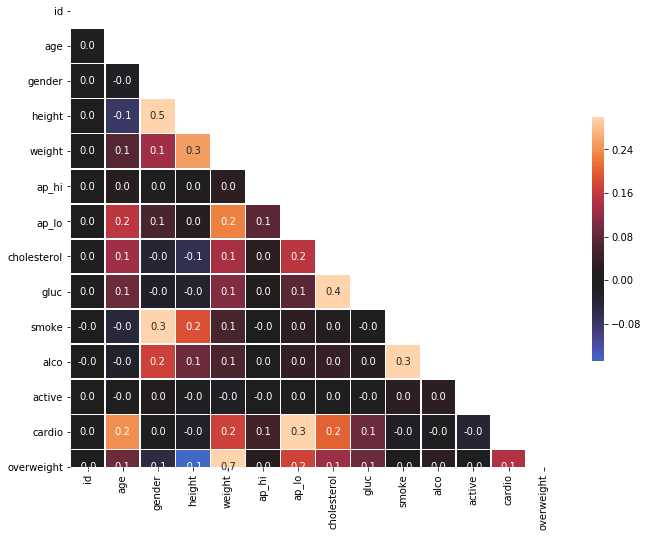

In [28]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig.savefig('images/heatmap.png')